# IS 670 Group Project
---

##Aim
The aim of this project is to leverage data analytics and machine learning techniques to construct a robust framework capable of accurately identifying and flagging fraudulent job postings within online recruitment platforms. By developing sophisticated algorithms trained on extensive datasets, our objective is to create a reliable system that enhances the security and credibility of these digital job markets. Through this initiative, we seek to establish a safer and more trustworthy environment for job seekers and employers alike, thereby fostering meaningful connections and bolstering confidence in the online recruitment process.

##Methodology
We employed a comprehensive data mining approach, beginning with an extensive preprocessing phase to clean and prepare the dataset for analysis. This included handling missing values, normalizing numeric variables, and encoding categorical ones. We then conducted exploratory data analysis (EDA) to visualize the data and understand underlying patterns and correlations among the variables.

For the modeling, classification algorithms were chosen: Decision Trees, Naïve Bayes, Random Forest, MLP, SVM and K-Nearest Neighbors (KNN). Each model was developed using a split of training and testing data, with performance evaluated using key metrics such as accuracy, sensitivity, and specificity, alongside confusion matrices, were used to compare the models' performance.

##Introduction

In the rapidly evolving landscape of online recruitment, the proliferation of fraudulent job postings has emerged as a significant challenge, undermining the trust and safety of digital job markets. These deceptive listings not only pose severe risks, such as financial losses and privacy breaches, but also compromise the credibility of genuine employers, affecting their ability to attract qualified candidates.

To address this critical issue, our initiative has leveraged the capabilities of machine learning to develop an advanced detection system. This sophisticated model is capable of distinguishing between genuine and fraudulent job postings with a high degree of accuracy. By integrating state-of-the-art data analytics and machine learning techniques, we aim to enhance the integrity and reliability of online job platforms, thus ensuring a secure and reliable environment for job seekers and employers alike.

This report delves into the development and deployment of our machine learning model, outlining the specific methodologies employed, the analysis of the dataset, and the architectural framework of the model. It further discusses the significant outcomes and the practical implications of our efforts. By strengthening the verification processes through technological innovation, we aspire to create a more trustworthy online job marketplace, which is crucial for the healthy functioning of the modern economy.

The sections that follow will provide a detailed account of our approach, from the initial concept to the final implementation, highlighting our model's capabilities in detecting and mitigating the risks associated with fraudulent job postings in the digital era.


##Data Understanding and Preprocessing
####Upload Data
Mount Google Drive to access the dataset stored in Google Drive.
Import necessary libraries for data manipulation and visualization.


####Data Cleaning
Check the column names and select the desired columns. Check for missing values. Examine variable types and convert categorical variables to the 'category' data type.

In [3]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import mean_absolute_error, r2_score

In [ ]:
fake = pd.read_csv("/content/drive/My Drive/IS670_data/fake_job_postings.csv")
fake

,job_id,title,location,department,salary_range,Salary,salary_0_1,company_profile,description,requirements,...,Employment_0_1,employment_type,required_experience,intern_0_1,required_education,Degree_1_0,Interview_ol_of,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,12000-15000,13500,0,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,...,0,Other,Internship,0,-,1,0,-,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,-,-,1,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,...,1,Full-time,Not Applicable,1,-,1,0,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",-,-,-,1,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,...,0,-,-,1,-,1,0,-,-,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,-,-,1,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",...,1,Full-time,Mid-Senior level,1,Bachelor's Degree,0,0,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",-,-,-,1,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,...,1,Full-time,Mid-Senior level,1,Bachelor's Degree,0,1,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50442,50443,.NET Developer,"US, MO, St. Louis",-,19000-19000,19000,0,"Located in the heart of the Green Mountains, o...",(We have more than 1500+ Job openings in our w...,-,...,1,Full-time,-,1,-,1,0,Computer Software,-,0
50443,50444,QA - QTP Automation Engineer - Descriptive Pro...,"US, TX, austin",-,-,-,1,"We design, deploy, and maintain advanced techn...",Excellent communication skills3-5 years using ...,-,...,0,Contract,Mid-Senior level,1,Bachelor's Degree,0,1,Telecommunications,Quality Assurance,0
50444,50445,Shipper (Portland),"US, OR, Portland",Operations,-,-,1,-,"Position available is located in our Portland,...",Essential Job FunctionsPicking;Packing;Stage o...,...,0,-,-,1,-,1,1,-,Other,0
50445,50446,PHP Web Developer,-,-,14000-16000,15000,0,Adbrain is at the forefront of the data-driven...,"As a Software engineer, you will participate i...",Minimum 3 years of professional development ex...,...,1,Full-time,-,1,-,1,0,-,-,0


In [ ]:
fake.keys()

Index(['job_id', 'title', 'location', 'department', 'salary_range', 'Salary',
       'salary_0_1', 'company_profile', 'description', 'requirements',
       'benefits', 'telecommuting', 'has_company_logo', 'has_questions',
       'Employment_0_1', 'employment_type', 'required_experience',
       'intern_0_1', 'required_education', 'Degree_1_0', 'Interview_ol_of',
       'industry', 'function', 'fraudulent'],
      dtype='object')

In [ ]:
import pandas as pd
fake.drop(['job_id','salary_range','salary_0_1', 'Employment_0_1', 'intern_0_1', 'Degree_1_0', 'Interview_ol_of'], axis=1, inplace=True)
fake

,title,location,department,Salary,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,13500,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,-,0,1,0,Other,Internship,-,-,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,-,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,-,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",-,-,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,-,0,1,0,-,-,-,-,-,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,-,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",-,-,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50442,.NET Developer,"US, MO, St. Louis",-,19000,"Located in the heart of the Green Mountains, o...",(We have more than 1500+ Job openings in our w...,-,-,0,0,0,Full-time,-,-,Computer Software,-,0
50443,QA - QTP Automation Engineer - Descriptive Pro...,"US, TX, austin",-,-,"We design, deploy, and maintain advanced techn...",Excellent communication skills3-5 years using ...,-,-,0,0,0,Contract,Mid-Senior level,Bachelor's Degree,Telecommunications,Quality Assurance,0
50444,Shipper (Portland),"US, OR, Portland",Operations,-,-,"Position available is located in our Portland,...",Essential Job FunctionsPicking;Packing;Stage o...,-,0,1,1,-,-,-,-,Other,0
50445,PHP Web Developer,-,-,15000,Adbrain is at the forefront of the data-driven...,"As a Software engineer, you will participate i...",Minimum 3 years of professional development ex...,"Competitive salary, and incentives according t...",0,1,1,Full-time,-,-,-,-,0


In [ ]:
fake.keys()

Index(['title', 'location', 'department', 'Salary', 'company_profile',
       'description', 'requirements', 'benefits', 'telecommuting',
       'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [ ]:
print("Descriptive statistics for the entire dataset:")
print(fake.describe(), "\n")

Descriptive statistics for the entire dataset:
       telecommuting  has_company_logo  has_questions    fraudulent
count   50447.000000      50447.000000   50447.000000  50447.000000
mean        0.043313          0.789819       0.502726      0.051539
std         0.203562          0.407441       0.499998      0.221097
min         0.000000          0.000000       0.000000      0.000000
25%         0.000000          1.000000       0.000000      0.000000
50%         0.000000          1.000000       1.000000      0.000000
75%         0.000000          1.000000       1.000000      0.000000
max         1.000000          1.000000       1.000000      1.000000 



In [ ]:
fake.isnull().sum()

title                      0
location                 358
department                 0
Salary                     0
company_profile            0
description                3
requirements            3172
benefits               21385
telecommuting              0
has_company_logo           0
has_questions              0
employment_type           45
required_experience        0
required_education         0
industry                   0
function                   0
fraudulent                 0
dtype: int64

In [ ]:
fake = fake.fillna('None')

In [ ]:
fake.isnull().sum()

title                  0
location               0
department             0
Salary                 0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [ ]:
fake.dtypes

title                  object
location               object
department             object
Salary                 object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

In [ ]:
fake['title'] = fake['title'].astype('category')
fake['Salary'] = fake['Salary'].astype('category')
fake['location'] = fake['location'].astype('category')
fake['department'] = fake['department'].astype('category')
fake['benefits'] = fake['benefits'].astype('category')
fake['employment_type'] = fake['employment_type'].astype('category')
fake['required_experience'] = fake['required_experience'].astype('category')
fake['required_education'] = fake['required_education'].astype('category')
fake['industry'] = fake['industry'].astype('category')
fake['function'] = fake['function'].astype('category')
fake['company_profile'] = fake['company_profile'].astype('category')
fake['description'] = fake['description'].astype('category')
fake['requirements'] = fake['requirements'].astype('category')

In [ ]:
fake.dtypes

title                  category
location               category
department             category
Salary                 category
company_profile        category
description            category
requirements           category
benefits               category
telecommuting             int64
has_company_logo          int64
has_questions             int64
employment_type        category
required_experience    category
required_education     category
industry               category
function               category
fraudulent                int64
dtype: object

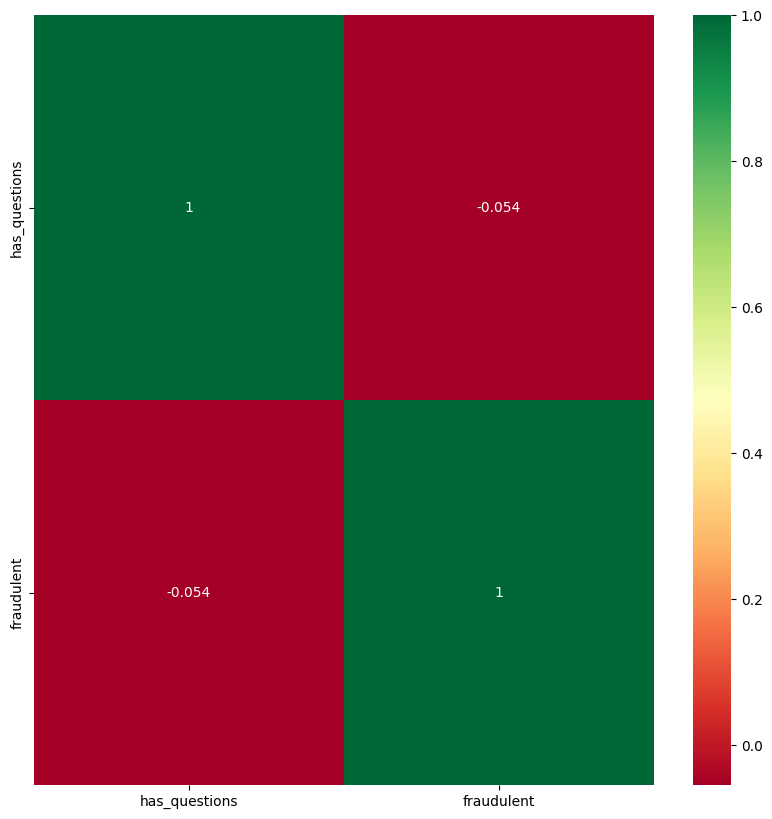

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

numeric_cols = fake.select_dtypes(include=[np.number])

corr_matrix = numeric_cols.corr()

high_corr_vars = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.1:
            colname = corr_matrix.columns[i]
            high_corr_vars.add(colname)

high_corr_list = list(high_corr_vars)

if high_corr_list:
    plt.figure(figsize=(10, 10))
    sns.heatmap(numeric_cols[high_corr_list].corr(), annot=True, cmap="RdYlGn")
    plt.show()
else:
    print("No highly correlated variables found")


In [ ]:
fake.describe()

,telecommuting,has_company_logo,has_questions,fraudulent
count,50447.000000,50447.000000,50447.000000,50447.000000
mean,0.043313,0.789819,0.502726,0.051539
std,0.203562,0.407441,0.499998,0.221097
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


##Visualizations

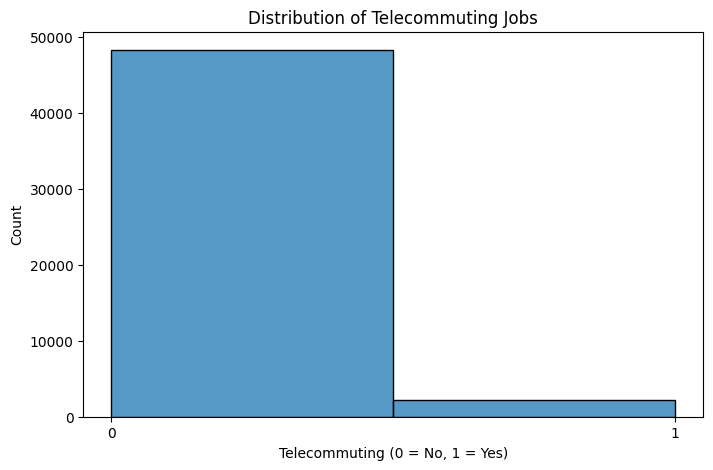

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(fake['telecommuting'], bins=2, kde=False)
plt.title('Distribution of Telecommuting Jobs')
plt.xlabel('Telecommuting (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks([0, 1])
plt.show()

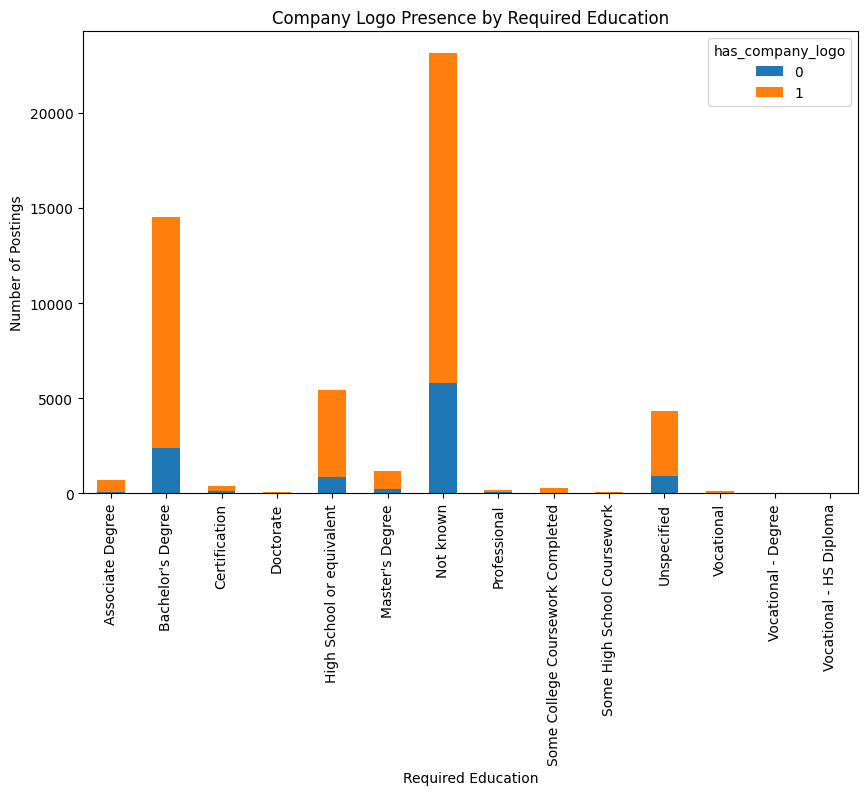

In [ ]:
fake['required_education'] = fake['required_education'].replace('-', 'Not known')
education_logo = pd.crosstab(fake['required_education'], fake['has_company_logo'])
education_logo.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Company Logo Presence by Required Education')
plt.xlabel('Required Education')
plt.ylabel('Number of Postings')
plt.xticks(rotation=90)
plt.show()

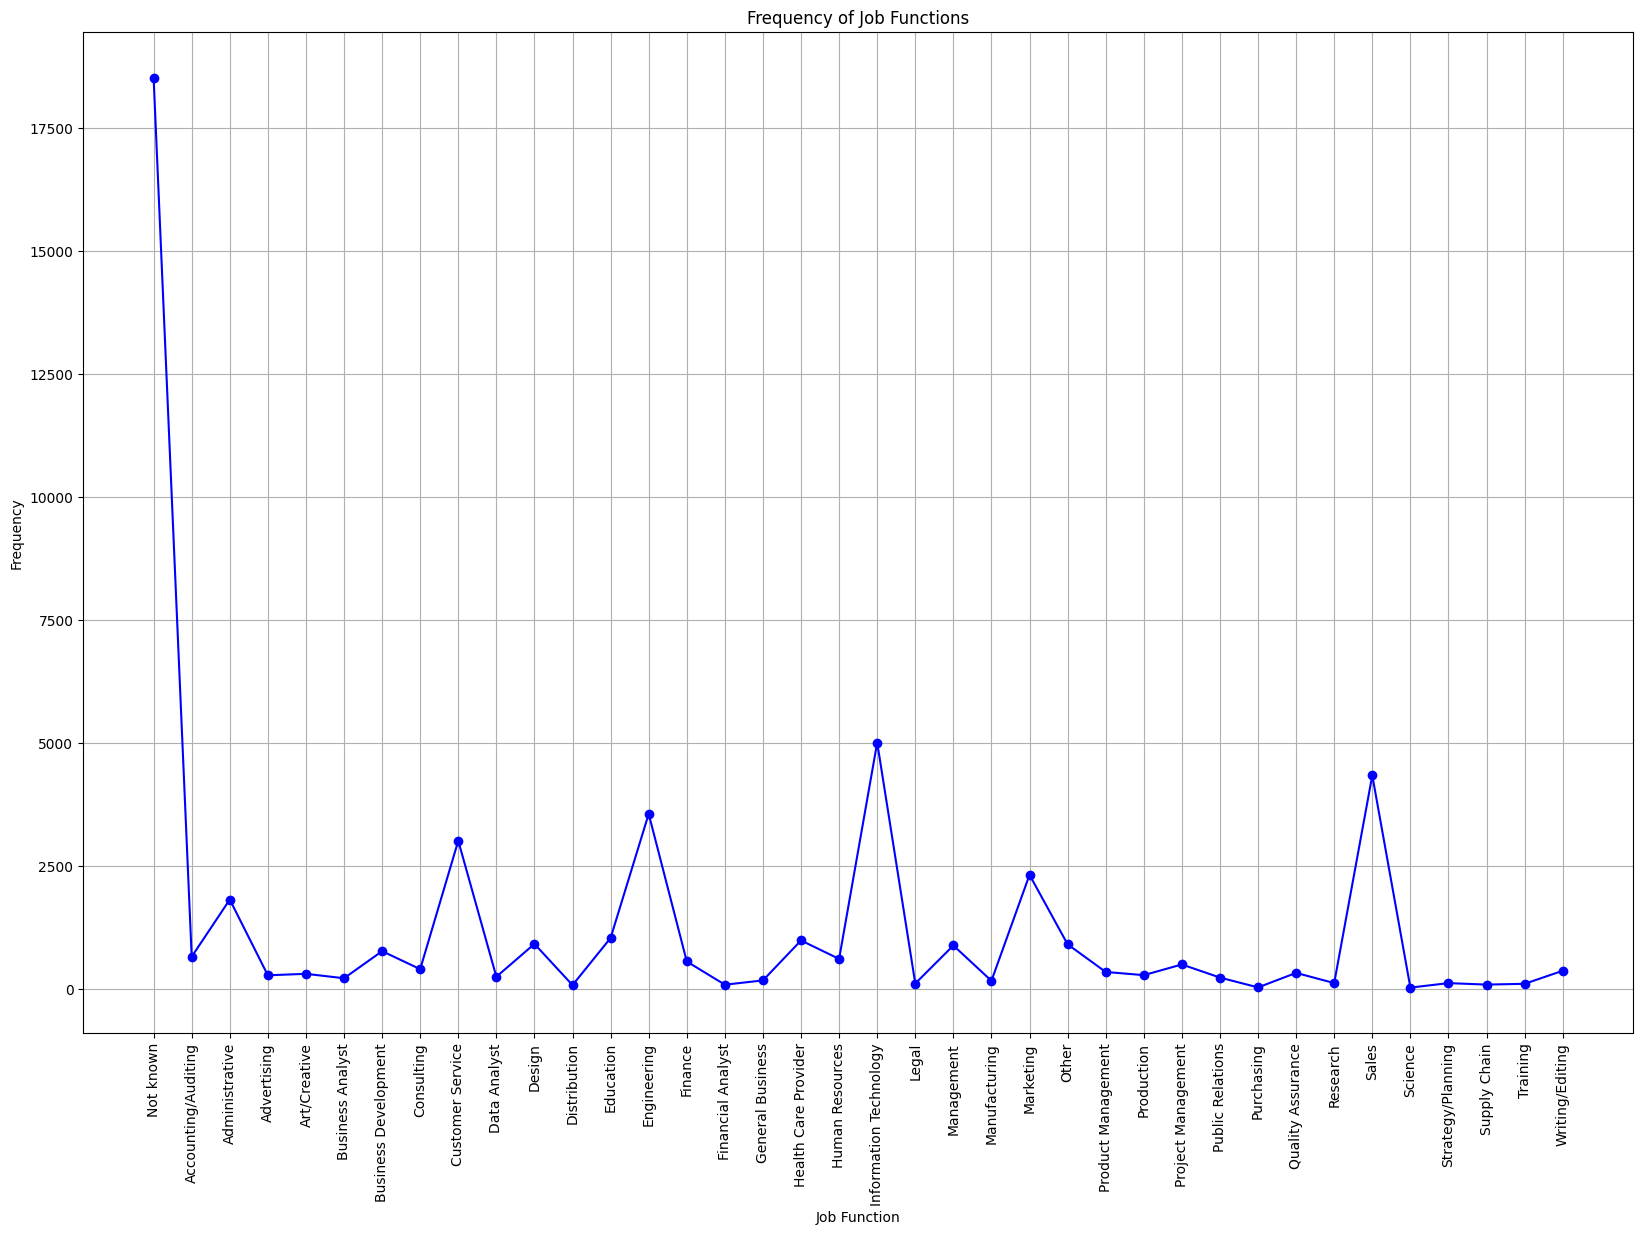

In [ ]:
function_counts = fake['function'].value_counts().sort_index()
plt.figure(figsize=(20, 13))
plt.plot(function_counts.index, function_counts.values, marker='o', linestyle='-', color='b')
plt.title('Frequency of Job Functions')
plt.xlabel('Job Function')
plt.ylabel('Frequency')
labels = [label if label != '-' else 'Not known' for label in function_counts.index]
plt.xticks(ticks=np.arange(len(labels)), labels=labels, rotation=90)
plt.grid(True)
plt.show()

<ipython-input-164-b26af954750b>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(salary_labels)


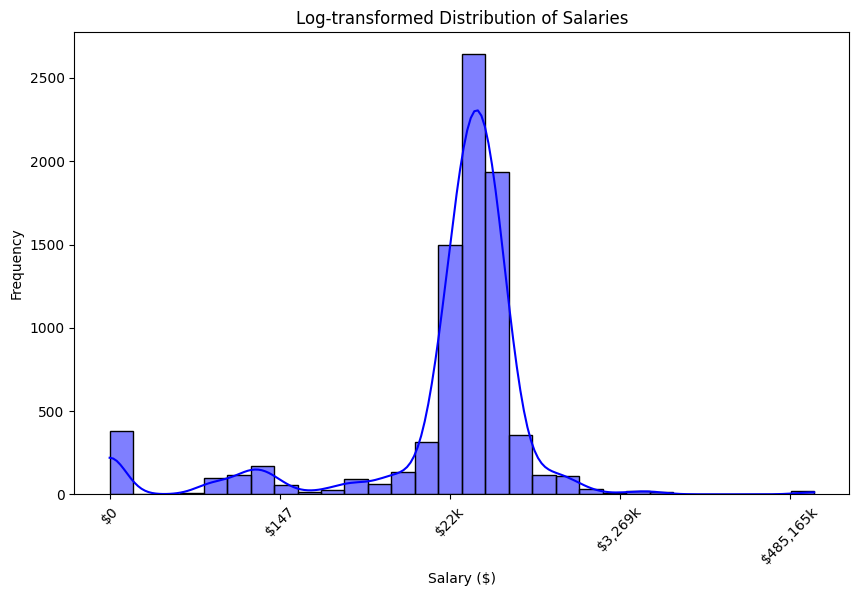

In [ ]:
fake['salary_numeric'] = pd.to_numeric(fake['Salary'], errors='coerce')
fake = fake.dropna(subset=['salary_numeric'])
log_salaries = np.log1p(fake['salary_numeric'])
plt.figure(figsize=(10, 6))
ax = sns.histplot(log_salaries, bins=30, kde=True, color='blue')
plt.title('Log-transformed Distribution of Salaries')
plt.xlabel('Salary ($)')
plt.ylabel('Frequency')
salary_ticks = ax.get_xticks()
salary_labels = ['${:,.0f}k'.format(np.expm1(tick)/1000) if np.expm1(tick)/1000 > 1 else '${:,.0f}'.format(np.expm1(tick)) for tick in salary_ticks]
ax.set_xticklabels(salary_labels)
plt.xticks(rotation=45)
plt.show()

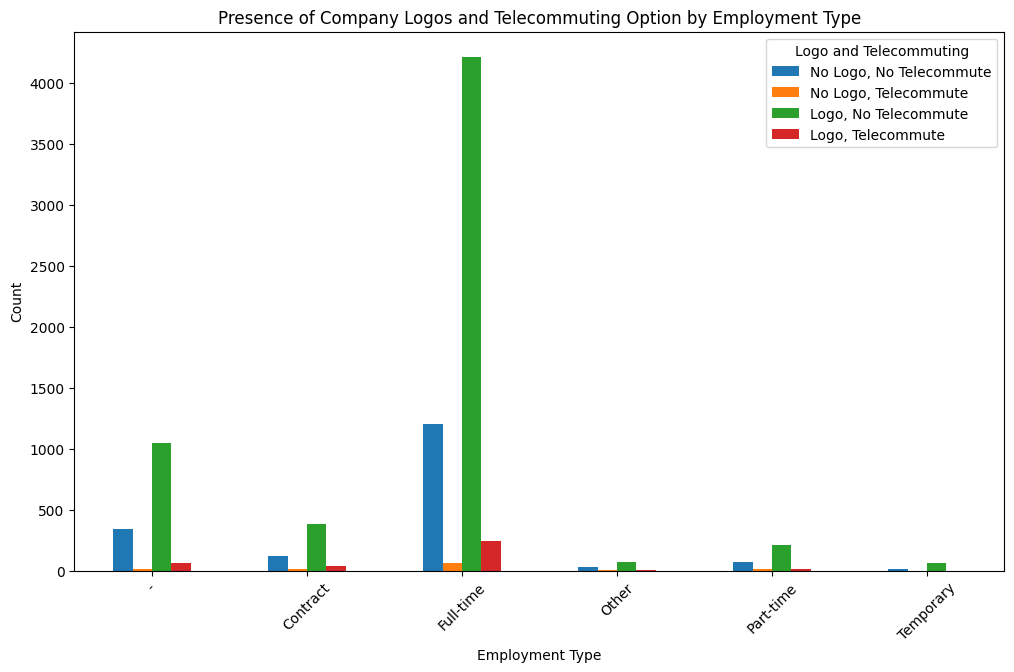

In [ ]:
clustered_data = pd.crosstab(fake['employment_type'], [fake['has_company_logo'], fake['telecommuting']])
clustered_data.plot(kind='bar', stacked=False, figsize=(12, 7))
plt.title('Presence of Company Logos and Telecommuting Option by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(["No Logo, No Telecommute", "No Logo, Telecommute", "Logo, No Telecommute", "Logo, Telecommute"], title="Logo and Telecommuting")
plt.show()

<ipython-input-166-1b58fb1abff0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake['required_education'] = fake['required_education'].replace({pd.NA: 'Not known', '-': 'Not known'})


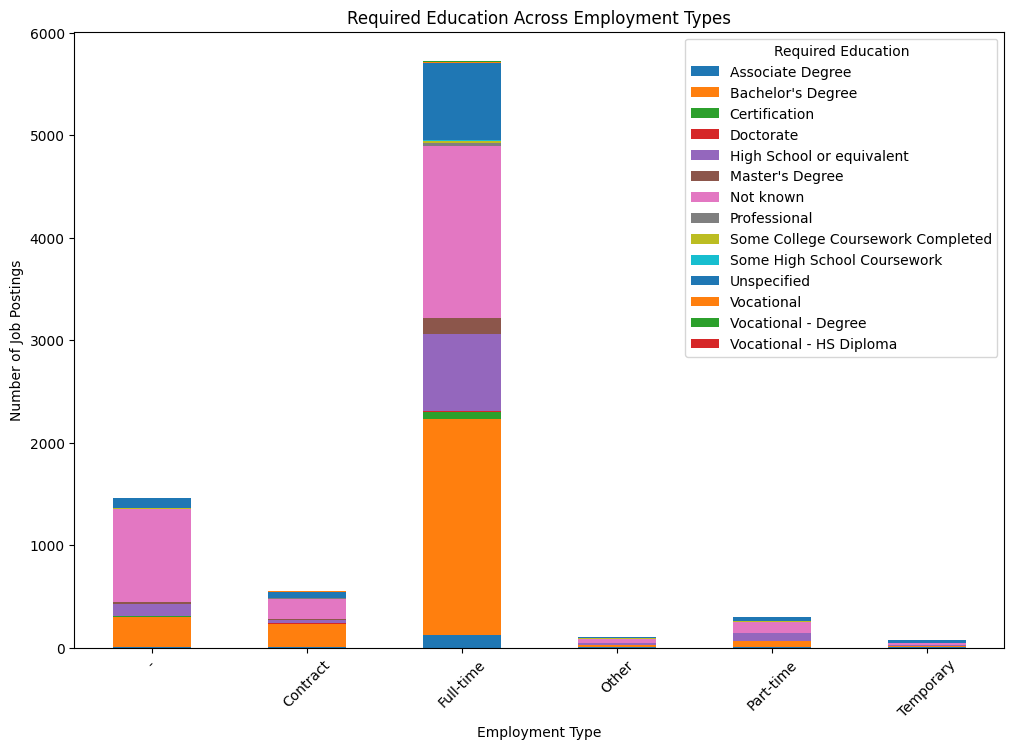

In [ ]:
fake['required_education'] = fake['required_education'].replace({pd.NA: 'Not known', '-': 'Not known'})
education_distribution = fake.groupby('employment_type')['required_education'].value_counts().unstack(fill_value=0)
education_distribution.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Required Education Across Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45)
plt.legend(title='Required Education')
plt.show()

In [ ]:
fake.keys()

Index(['title', 'location', 'department', 'Salary', 'company_profile',
       'description', 'requirements', 'benefits', 'telecommuting',
       'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [ ]:
fake = pd.get_dummies(fake, columns=['department','Salary',
       'employment_type', 'required_experience',
       'required_education', 'industry',
       'function'], drop_first=True)
fake

,title,location,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,fraudulent,...,function_Public Relations,function_Purchasing,function_Quality Assurance,function_Research,function_Sales,function_Science,function_Strategy/Planning,function_Supply Chain,function_Training,function_Writing/Editing
0,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,-,0,1,0,0,...,False,False,False,False,False,False,False,False,False,False
1,Customer Service - Cloud Video Production,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,0,...,False,False,False,False,False,False,False,False,False,False
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,-,0,1,0,0,...,False,False,False,False,False,False,False,False,False,False
3,Account Executive - Washington DC,"US, DC, Washington",Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,0,...,False,False,False,False,True,False,False,False,False,False
4,Bill Review Manager,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50442,.NET Developer,"US, MO, St. Louis","Located in the heart of the Green Mountains, o...",(We have more than 1500+ Job openings in our w...,-,-,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
50443,QA - QTP Automation Engineer - Descriptive Pro...,"US, TX, austin","We design, deploy, and maintain advanced techn...",Excellent communication skills3-5 years using ...,-,-,0,0,0,0,...,False,False,True,False,False,False,False,False,False,False
50444,Shipper (Portland),"US, OR, Portland",-,"Position available is located in our Portland,...",Essential Job FunctionsPicking;Packing;Stage o...,-,0,1,1,0,...,False,False,False,False,False,False,False,False,False,False
50445,PHP Web Developer,-,Adbrain is at the forefront of the data-driven...,"As a Software engineer, you will participate i...",Minimum 3 years of professional development ex...,"Competitive salary, and incentives according t...",0,1,1,0,...,False,False,False,False,False,False,False,False,False,False


###Text Vectorization

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=20, min_df=0.1, max_df=0.7)
text_columns = ['title']
for column in text_columns:

    tfidf_matrix = vectorizer.fit_transform(fake[column].astype('str'))
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=[f"{column}_{word}" for word in vectorizer.get_feature_names_out()])
    tfidf_df = tfidf_df.astype('float32')
    fake = pd.concat([fake.drop(column, axis=1), tfidf_df], axis=1)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=885, min_df=0.1, max_df=0.7)
text_columns = ['company_profile']
for column in text_columns:

    tfidf_matrix = vectorizer.fit_transform(fake[column].astype('str'))
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=[f"{column}_{word}" for word in vectorizer.get_feature_names_out()])
    tfidf_df = tfidf_df.astype('float32')
    fake = pd.concat([fake.drop(column, axis=1), tfidf_df], axis=1)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5, min_df=0.1, max_df=0.7)
text_columns = ['location']
for column in text_columns:

    tfidf_matrix = vectorizer.fit_transform(fake[column].astype('str'))
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=[f"{column}_{word}" for word in vectorizer.get_feature_names_out()])
    tfidf_df = tfidf_df.astype('float32')
    fake = pd.concat([fake.drop(column, axis=1), tfidf_df], axis=1)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=678, min_df=0.1, max_df=0.7)
text_columns = ['benefits']
for column in text_columns:

    tfidf_matrix = vectorizer.fit_transform(fake[column].astype('str'))
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=[f"{column}_{word}" for word in vectorizer.get_feature_names_out()])
    tfidf_df = tfidf_df.astype('float32')
    fake = pd.concat([fake.drop(column, axis=1), tfidf_df], axis=1)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2074, min_df=0.4, max_df=0.6)
text_columns = ['description']

for column in text_columns:

    tfidf_matrix = vectorizer.fit_transform(fake[column].astype('str'))
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=[f"{column}_{word}" for word in vectorizer.get_feature_names_out()])
    tfidf_df = tfidf_df.astype('float32')
    fake = pd.concat([fake.drop(column, axis=1), tfidf_df], axis=1)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer(max_features=1612, min_df=0.1, max_df=0.7)

text_columns = ['requirements']

for column in text_columns:

    tfidf_matrix = vectorizer.fit_transform(fake[column].astype('str'))
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=[f"{column}_{word}" for word in vectorizer.get_feature_names_out()])
    fake = pd.concat([fake.drop(column, axis=1), tfidf_df], axis=1)

In [ ]:
fake

,telecommuting,has_company_logo,has_questions,fraudulent,department_ \tCorporate Shared Services,department_ Lower Level Management,department_ Marketing,department_ Moni Technologies,department_ R&D,department_(Consultant),...,requirements_web,requirements_well,requirements_will,requirements_with,requirements_work,requirements_working,requirements_written,requirements_years,requirements_you,requirements_your
0,0,1,0,0,False,False,False,False,False,False,...,0.000000,0.0,0.000000,0.453806,0.000000,0.297817,0.000000,0.000000,0.000000,0.000000
1,0,1,0,0,False,False,False,False,False,False,...,0.000000,0.0,0.096024,0.106563,0.137866,0.087417,0.000000,0.000000,0.088565,0.202749
2,0,1,0,0,False,False,False,False,False,False,...,0.000000,0.0,0.000000,0.276312,0.142991,0.000000,0.000000,0.000000,0.000000,0.000000
3,0,1,0,0,False,False,False,False,False,False,...,0.000000,0.0,0.000000,0.232547,0.075214,0.000000,0.095202,0.074498,0.000000,0.110612
4,0,1,1,0,False,False,False,False,False,False,...,0.000000,0.0,0.000000,0.103235,0.133561,0.169375,0.000000,0.132288,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50442,0,0,0,0,False,False,False,False,False,False,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50443,0,0,0,0,False,False,False,False,False,False,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50444,0,1,1,0,False,False,False,False,False,False,...,0.000000,0.0,0.129975,0.072120,0.186612,0.118325,0.000000,0.030806,0.000000,0.045739
50445,0,1,1,0,False,False,False,False,False,False,...,0.243638,0.0,0.227258,0.126101,0.000000,0.000000,0.000000,0.161588,0.000000,0.000000


##Partitioning the Dataset

In [ ]:
target = fake['fraudulent']
print(target.value_counts(normalize=True))

fraudulent
0    0.948461
1    0.051539
Name: proportion, dtype: float64


In [ ]:
predictors = fake.drop(['fraudulent'],axis=1)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.3, random_state=0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(35312, 2125) (15135, 2125) (35312,) (15135,)


In [ ]:
combined_train_df = pd.concat([predictors_train, target_train], axis=1)

In [ ]:
majority_df = combined_train_df[combined_train_df['fraudulent'] == 0]
minority_df = combined_train_df[combined_train_df['fraudulent'] == 1]

undersampled_majority = majority_df.sample(n=len(minority_df), random_state=5)

undersampled_data = pd.concat([undersampled_majority, minority_df])

balanced_data = undersampled_data.sample(frac=1, random_state=5)

In [ ]:
predictors_train = balanced_data.drop(columns=['fraudulent'])
target_train = balanced_data['fraudulent']

In [ ]:
print("Combined train DataFrame shape:", combined_train_df.shape)
print("fraudulent value counts in combined DataFrame:\n", combined_train_df['fraudulent'].value_counts())

Combined train DataFrame shape: (35312, 2126)
fraudulent value counts in combined DataFrame:
 fraudulent
0    33502
1     1810
Name: count, dtype: int64


In [ ]:
print("Majority class shape:", majority_df.shape)
print("Minority class shape:", minority_df.shape)

Majority class shape: (33502, 2126)
Minority class shape: (1810, 2126)


In [ ]:
print("Balanced data shape:", balanced_data.shape)
print("fraudulent value counts in balanced data:\n", balanced_data['fraudulent'].value_counts())

Balanced data shape: (3620, 2126)
fraudulent value counts in balanced data:
 fraudulent
1    1810
0    1810
Name: count, dtype: int64


In [ ]:
print(target_train.value_counts(normalize=True), target_train.shape)

fraudulent
1    0.5
0    0.5
Name: proportion, dtype: float64 (3620,)


In [ ]:
print(target_test.value_counts(normalize=True), target_test.shape)

fraudulent
0    0.947803
1    0.052197
Name: proportion, dtype: float64 (15135,)


##Decision Tree

In [ ]:
model = DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = 2)
model.fit(predictors_train, target_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)

[Text(0.5, 0.8333333333333334, 'industry_Oil & Energy <= 0.5\nentropy = 1.0\nsamples = 3620\nvalue = [1810, 1810]\nclass = No'),
 Text(0.25, 0.5, 'has_company_logo <= 0.5\nentropy = 0.994\nsamples = 3288\nvalue = [1796, 1492]\nclass = No'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.924\nsamples = 1058\nvalue = [359, 699]\nclass = Yes'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.939\nsamples = 2230\nvalue = [1437, 793]\nclass = No'),
 Text(0.75, 0.5, 'description_that <= 0.089\nentropy = 0.252\nsamples = 332\nvalue = [14, 318]\nclass = Yes'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.387\nsamples = 185\nvalue = [14, 171]\nclass = Yes'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.0\nsamples = 147\nvalue = [0, 147]\nclass = Yes')]

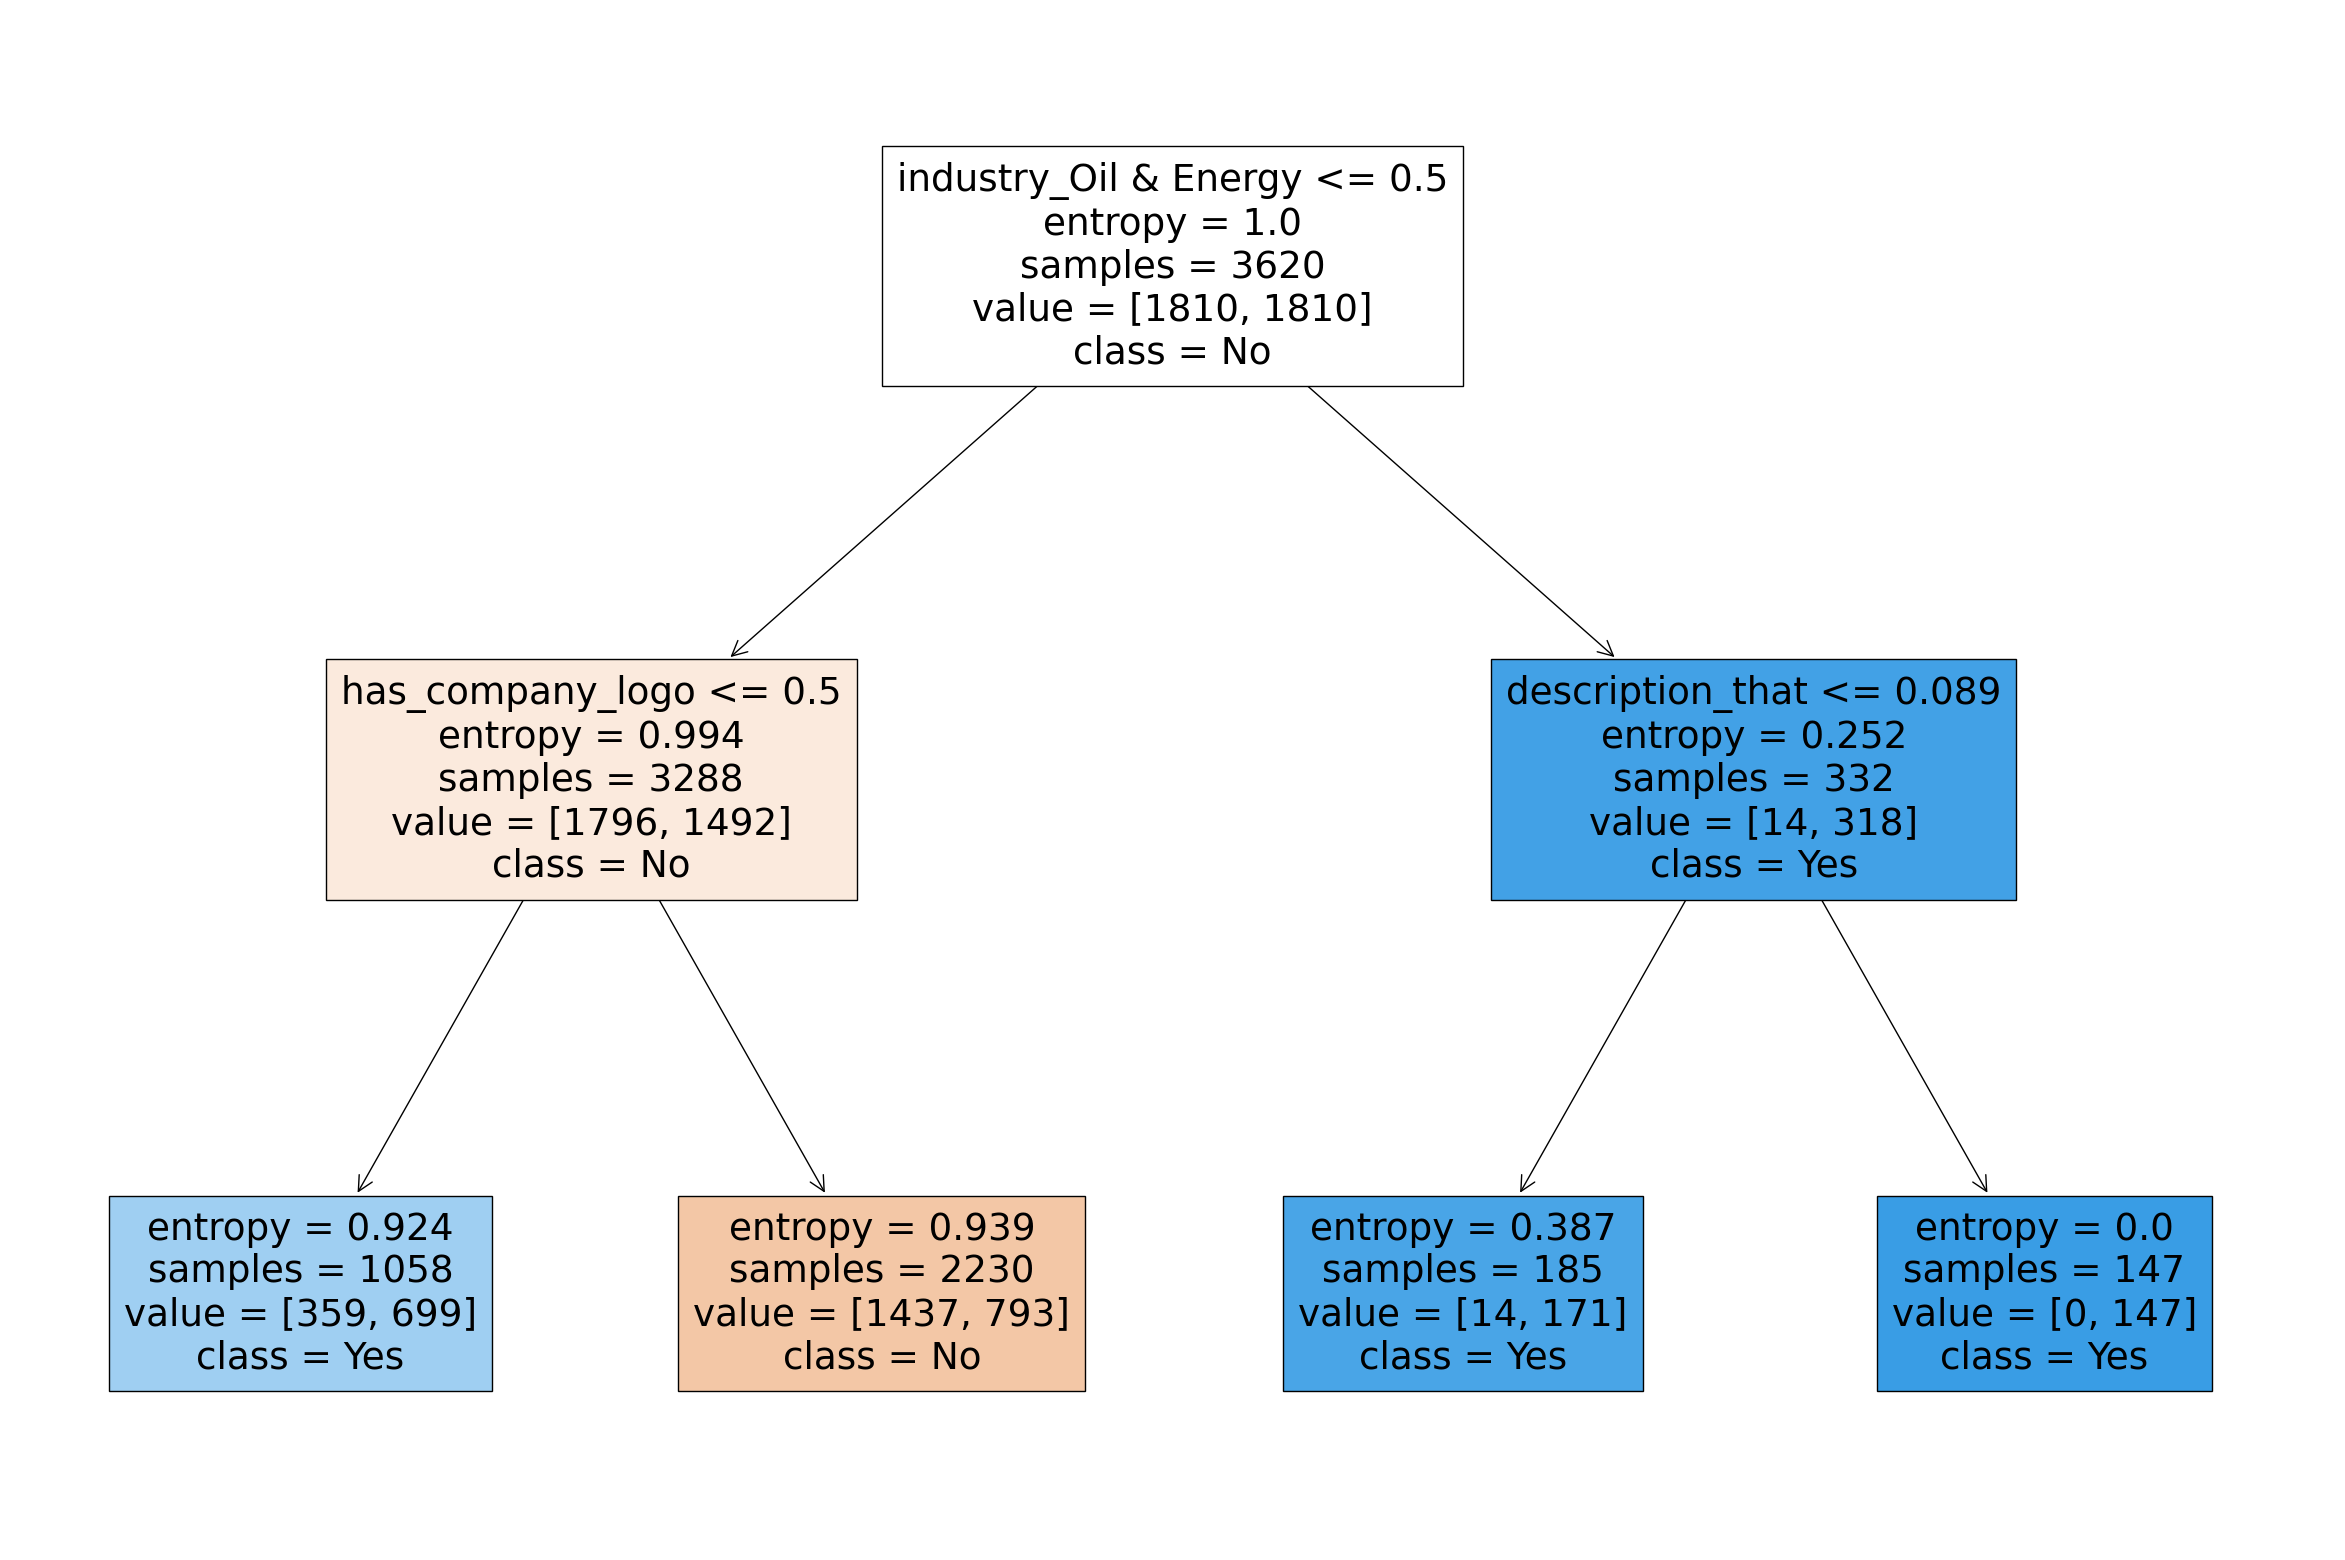

In [ ]:
fig = plt.figure(figsize=(30,20))
tree.plot_tree(model,
               feature_names=list(predictors_train.columns),
               class_names=['No','Yes'],
               filled=True)

In [ ]:
print(tree.export_text(model, feature_names=list(fake.columns)[1:]))

|--- industry_Oil & Energy <= 0.50
|   |--- has_questions <= 0.50
|   |   |--- class: 1
|   |--- has_questions >  0.50
|   |   |--- class: 0
|--- industry_Oil & Energy >  0.50
|   |--- description_that <= 0.09
|   |   |--- class: 1
|   |--- description_that >  0.09
|   |   |--- class: 1



In [ ]:
prediction_on_test = model.predict(predictors_test)

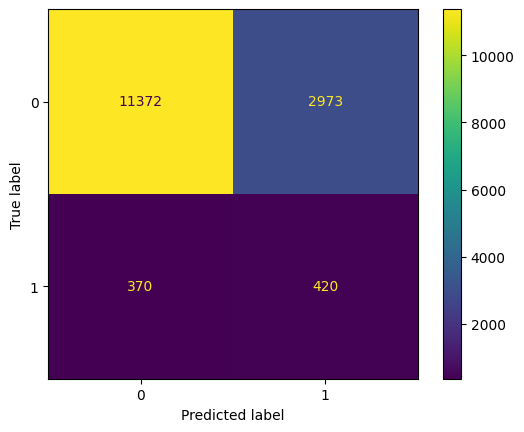

In [ ]:
cm = confusion_matrix(target_test, prediction_on_test)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()

In [ ]:
print(classification_report(target_test, prediction_on_test))

              precision    recall  f1-score   support

           0       0.97      0.79      0.87     14345
           1       0.12      0.53      0.20       790

    accuracy                           0.78     15135
   macro avg       0.55      0.66      0.54     15135
weighted avg       0.92      0.78      0.84     15135



In [ ]:
prediction_on_train = model.predict(predictors_train)

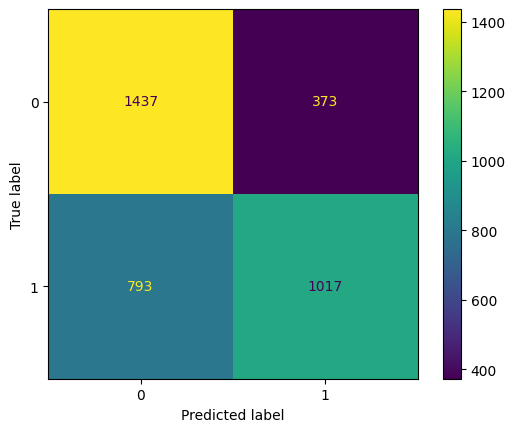

In [ ]:
cm = confusion_matrix(target_train, prediction_on_train)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()

In [ ]:
print(classification_report(target_train, prediction_on_train))

              precision    recall  f1-score   support

           0       0.64      0.79      0.71      1810
           1       0.73      0.56      0.64      1810

    accuracy                           0.68      3620
   macro avg       0.69      0.68      0.67      3620
weighted avg       0.69      0.68      0.67      3620



##Random Forest classifier Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(
    n_estimators=100,
    criterion="entropy",
    max_depth=10,
    random_state=1
)

In [ ]:
random_forest_model.fit(predictors_train, target_train)

RandomForestClassifier(criterion='entropy', max_depth=10, random_state=1)

In [ ]:
predictions_on_test = random_forest_model.predict(predictors_test)

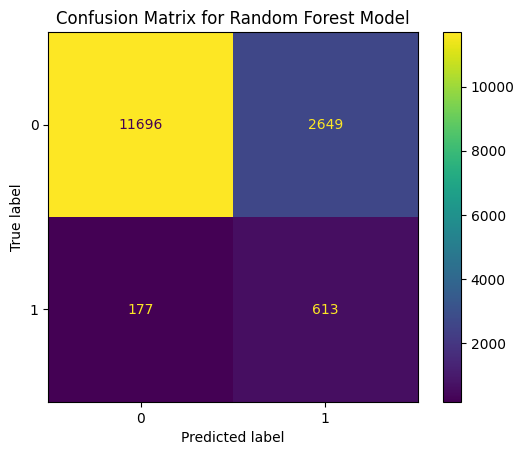

In [ ]:
cm = confusion_matrix(target_test, predictions_on_test)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [ ]:
print(classification_report(target_test, predictions_on_test))

              precision    recall  f1-score   support

           0       0.99      0.82      0.89     14345
           1       0.19      0.78      0.30       790

    accuracy                           0.81     15135
   macro avg       0.59      0.80      0.60     15135
weighted avg       0.94      0.81      0.86     15135



In [ ]:
predictions_on_train = random_forest_model.predict(predictors_train)

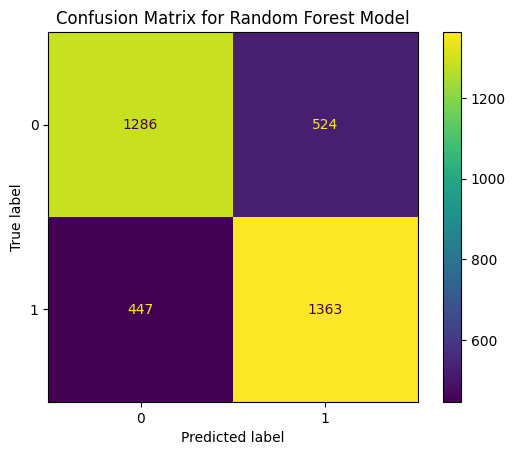

In [ ]:
cm = confusion_matrix(target_train, predictions_on_train)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [ ]:
print(classification_report(target_train, predictions_on_train))

              precision    recall  f1-score   support

           0       0.74      0.71      0.73      1810
           1       0.72      0.75      0.74      1810

    accuracy                           0.73      3620
   macro avg       0.73      0.73      0.73      3620
weighted avg       0.73      0.73      0.73      3620



##Naive Bayes classifier

In [ ]:
model_NB = MultinomialNB()
model_NB.fit(predictors_train, target_train)

MultinomialNB()

In [ ]:
prediction_on_train_NB = model_NB.predict(predictors_train)

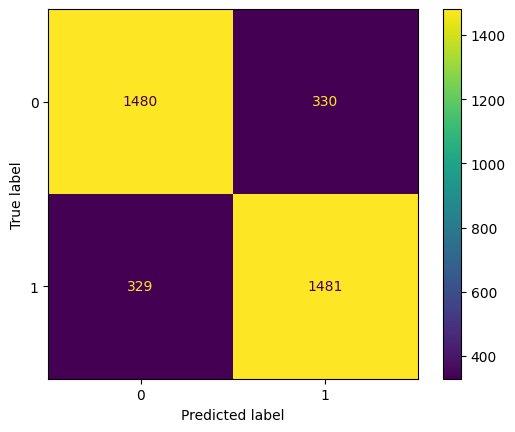

In [ ]:
cm_NB = confusion_matrix(target_train, prediction_on_train_NB)
ConfusionMatrixDisplay(confusion_matrix=cm_NB, display_labels=model_NB.classes_).plot()

In [ ]:
train_predictions_NB = model_NB.predict(predictors_train)
print(classification_report(target_train, train_predictions_NB))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1810
           1       0.82      0.82      0.82      1810

    accuracy                           0.82      3620
   macro avg       0.82      0.82      0.82      3620
weighted avg       0.82      0.82      0.82      3620



In [ ]:
prediction_on_test_NB = model_NB.predict(predictors_test)

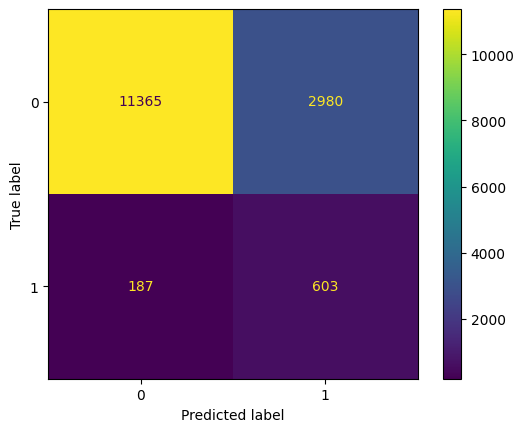

In [ ]:
cm_NB = confusion_matrix(target_test, prediction_on_test_NB)
ConfusionMatrixDisplay(confusion_matrix=cm_NB, display_labels=model_NB.classes_).plot()

In [ ]:
train_predictions_NB = model_NB.predict(predictors_test)
print(classification_report(target_test, train_predictions_NB))

              precision    recall  f1-score   support

           0       0.98      0.79      0.88     14345
           1       0.17      0.76      0.28       790

    accuracy                           0.79     15135
   macro avg       0.58      0.78      0.58     15135
weighted avg       0.94      0.79      0.85     15135



##K- Nearest Neighbors

In [ ]:
modelKNN = KNeighborsClassifier(n_neighbors = 8)
modelKNN.fit(predictors_train, target_train)

KNeighborsClassifier(n_neighbors=8)

In [ ]:
prediction_on_train_KNN = modelKNN.predict(predictors_train)
prediction_on_test_KNN = modelKNN.predict(predictors_test)

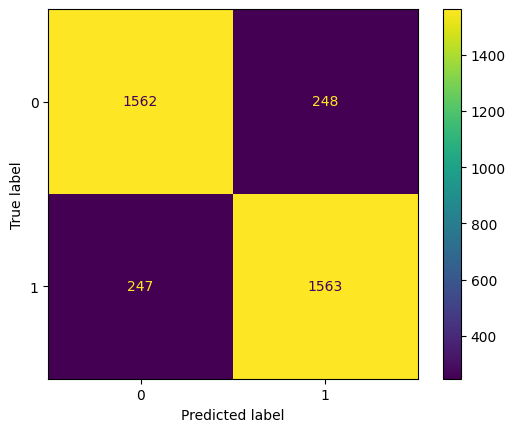

In [ ]:
cm = confusion_matrix(target_train, prediction_on_train_KNN)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelKNN.classes_).plot()

In [ ]:
print(classification_report(target_train, prediction_on_train_KNN))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1810
           1       0.86      0.86      0.86      1810

    accuracy                           0.86      3620
   macro avg       0.86      0.86      0.86      3620
weighted avg       0.86      0.86      0.86      3620



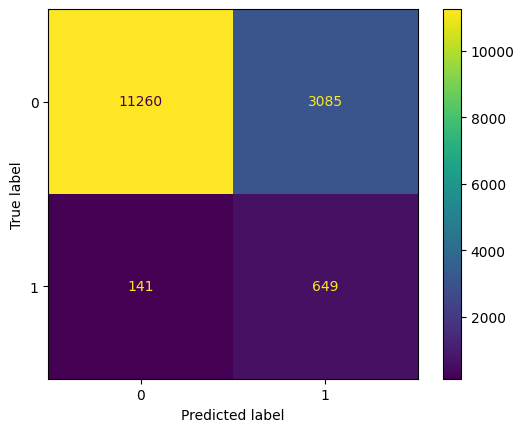

In [ ]:
cm = confusion_matrix(target_test, prediction_on_test_KNN)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelKNN.classes_).plot()

In [ ]:
print(classification_report(target_test, prediction_on_test_KNN))

              precision    recall  f1-score   support

           0       0.99      0.78      0.87     14345
           1       0.17      0.82      0.29       790

    accuracy                           0.79     15135
   macro avg       0.58      0.80      0.58     15135
weighted avg       0.95      0.79      0.84     15135



##SVM model

In [ ]:
model_SVM1 = SVC()
model_SVM1.fit(predictors_train, target_train)

SVC()

In [ ]:
prediction_on_test = prediction_on_test_fake = model_SVM1.predict(predictors_test)

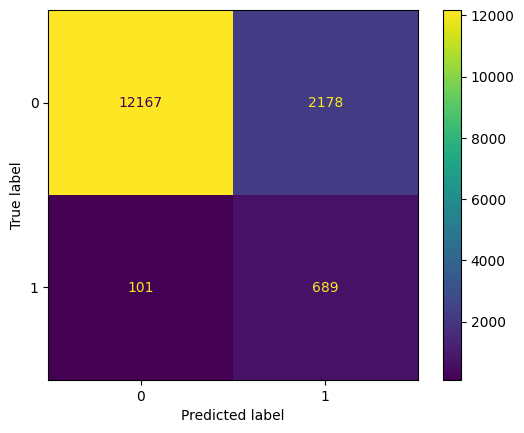

In [ ]:
cm_test = confusion_matrix(target_test, prediction_on_test)
ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=model_SVM1.classes_).plot()

In [ ]:
print(classification_report(target_test, prediction_on_test))

              precision    recall  f1-score   support

           0       0.99      0.85      0.91     14345
           1       0.24      0.87      0.38       790

    accuracy                           0.85     15135
   macro avg       0.62      0.86      0.65     15135
weighted avg       0.95      0.85      0.89     15135



In [ ]:
prediction_on_train = prediction_on_train_fake = model_SVM1.predict(predictors_train)

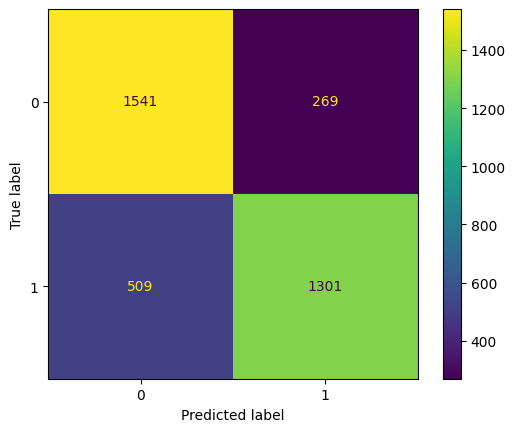

In [ ]:
cm_test = confusion_matrix(target_train, prediction_on_train)
ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=model_SVM1.classes_).plot()

In [ ]:
print(classification_report(target_train, prediction_on_train))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80      1810
           1       0.83      0.72      0.77      1810

    accuracy                           0.79      3620
   macro avg       0.79      0.79      0.78      3620
weighted avg       0.79      0.79      0.78      3620



##MLP model

In [ ]:
model_MLP1 = MLPClassifier(hidden_layer_sizes=(16, 4), activation='tanh',
                           alpha=0.005, learning_rate_init=0.001, random_state=1)
model_MLP1.fit(predictors_train, target_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', alpha=0.005, hidden_layer_sizes=(16, 4),
              random_state=1)

In [ ]:
prediction_on_train = model_MLP1.predict(predictors_train)

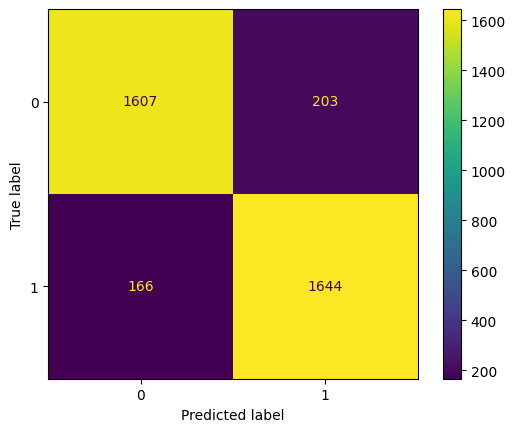

In [ ]:
cm = confusion_matrix(target_train, prediction_on_train)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [ ]:
print(classification_report(target_train, prediction_on_train))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1810
           1       0.89      0.91      0.90      1810

    accuracy                           0.90      3620
   macro avg       0.90      0.90      0.90      3620
weighted avg       0.90      0.90      0.90      3620



In [ ]:
prediction_on_test = model_MLP1.predict(predictors_test)

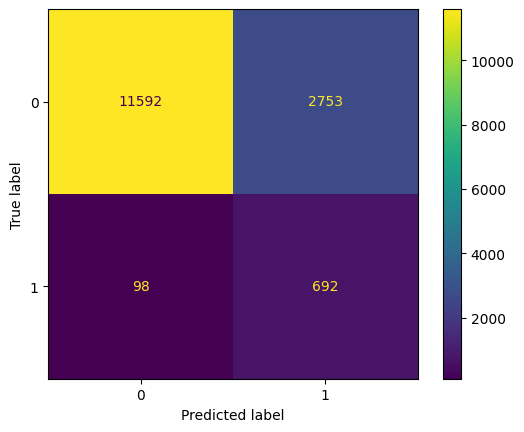

In [ ]:
cm = confusion_matrix(target_test, prediction_on_test)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [ ]:
print(classification_report(target_test, prediction_on_test))

              precision    recall  f1-score   support

           0       0.99      0.81      0.89     14345
           1       0.20      0.88      0.33       790

    accuracy                           0.81     15135
   macro avg       0.60      0.84      0.61     15135
weighted avg       0.95      0.81      0.86     15135



##Overall Comparison

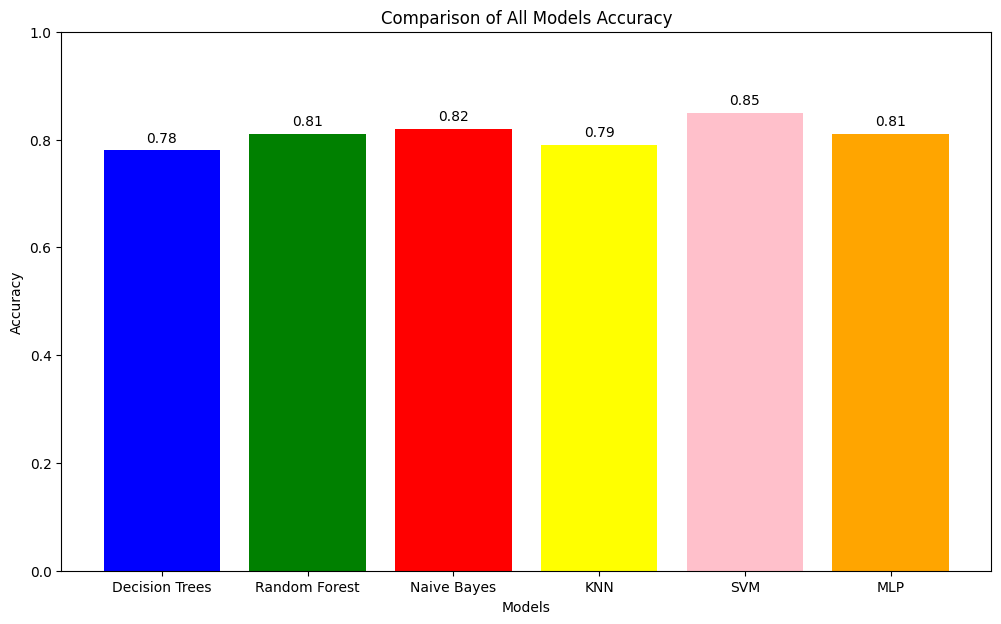

In [ ]:
import matplotlib.pyplot as plt

accuracies = {
    'Decision Trees': 0.78,
    'Random Forest': 0.81,
    'Naive Bayes': 0.82,
    'KNN': 0.79,
    'SVM': 0.85,
    'MLP': 0.81
}

models = list(accuracies.keys())
accuracy_values = [accuracies[model] for model in models]

plt.figure(figsize=(12, 7))
bars = plt.bar(models, accuracy_values, color=['blue', 'green', 'red', 'yellow', 'pink', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of All Models Accuracy')
plt.ylim([0, 1])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

plt.show()

**Explanation:**<br>
The graph presented illustrates a comparative analysis of the accuracy across different predictive models developed in our project. This comparison is crucial for selecting the most effective model for detecting fraudulent job postings based on the dataset prepared and balanced as described earlier. The models assessed include Decision Trees, Random Forest, Naïve Bayes, KNN, SVM, and MLP.

Interpretation of Results

Decision Trees: Showed an accuracy of 0.78. While decision trees are easy to interpret and fast to train, their simpler decision boundaries might have limited their performance compared to more complex models.

Random Forest: Achieved an accuracy of 0.81. As an ensemble of decision trees, Random Forest naturally performs better than a single decision tree due to its ability to average multiple trees that individually overfit to their samples, thus reducing the overall model variance.

Naïve Bayes: Exhibited an accuracy of 0.82. Despite the assumption of feature independence, Naïve Bayes often performs surprisingly well in practice, especially in high-dimensional settings like text classification, due to its efficient handling of many features.

KNN: Recorded an accuracy of 0.79. The performance of KNN can be affected by the choice of the distance metric and the value of 'k'. Its relatively lower performance might indicate that the feature space does not lend itself well to distance-based clustering of examples.

SVM: Scored the highest accuracy of 0.85. SVMs are particularly effective for classification when there is a clear margin of separation in high-dimensional space, which likely contributed to its superior performance in this task.

MLP: Matched the Random Forest with an accuracy of 0.81. As a neural network, MLP has the potential for high performance but requires careful tuning of its architecture and training parameters. Its performance reflects a balanced approach but suggests there might be room for optimization.

Conclusion and Model Selection

The SVM model demonstrated the highest accuracy among all the models tested, making it the preferred choice for further development and deployment in our project. Its ability to handle non-linear data boundaries effectively makes it particularly suitable for complex classification tasks such as ours. Moving forward, the focus will be on refining the SVM model, possibly exploring different kernel functions and regularization techniques to further enhance its performance.

Impact and Implications

Choosing the right model based on empirical evidence ensures that our project not only achieves high accuracy in detecting fraudulent job postings but also maintains robustness and generalizability to new data. This model evaluation step is crucial for deploying a reliable system that stakeholders can trust for maintaining the integrity of job postings on online platforms.

In [7]:
!jupyter nbconvert --to html "/content/drive/My Drive/Colab Notebooks/ML Project (Group 8).ipynb"

[NbConvertApp] Converting notebook /content/drive/My Drive/Colab Notebooks/ML Project (Group 8).ipynb to html
[NbConvertApp] Writing 2007986 bytes to /content/drive/My Drive/Colab Notebooks/ML Project (Group 8).html
